In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf

In [1]:
file_path = 'us26_data/1.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()

from_node = lines[0].strip()
to_node = lines[1].strip()
traffic_values = [float(value.strip()) for value in lines[2:]]

In [4]:
data = np.reshape(traffic_values, (len(traffic_values), 1))
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [5]:
window_size = 100
X, y = [], []

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

In [6]:
train_split = 0.8
validation_split = 0.1
test_split = 0.1

train_split_index = int(len(scaled_data) * train_split)
validation_split_index = int(len(scaled_data) * (train_split + validation_split))

X_train = X[:train_split_index]
Y_train = y[:train_split_index]
X_validation = X[train_split_index:validation_split_index]
Y_validation = y[train_split_index:validation_split_index]
X_test = X[validation_split_index:]
Y_test = y[validation_split_index:]

print("Rozmiar zbioru treningowego:", len(X_train))
print("Rozmiar zbioru walidacyjnego:", len(X_validation))
print("Rozmiar zbioru testowego:", len(X_test))

Rozmiar zbioru treningowego: 15437
Rozmiar zbioru walidacyjnego: 1930
Rozmiar zbioru testowego: 1830


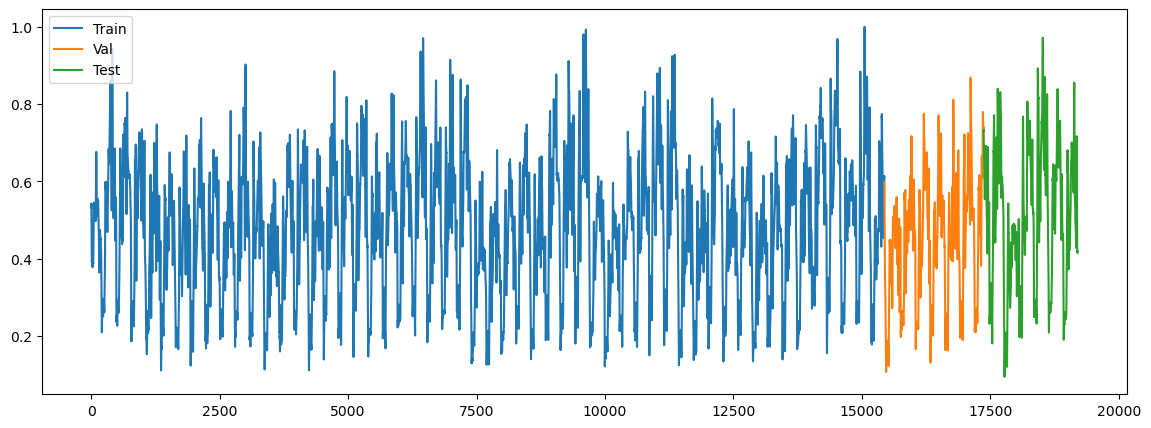

In [7]:
time_train = range(len(Y_train))
time_validation = range(len(Y_train), len(Y_train) + len(Y_validation))
time_test = range(len(Y_train) + len(Y_validation), len(Y_train) + len(Y_validation) + len(Y_test))

plt.figure(figsize=(14, 5))
plt.plot(time_train, Y_train)
plt.plot(time_validation,Y_validation)
plt.plot(time_test, Y_test)
plt.title('Data')
plt.legend(['Train', 'Val', 'Test'])
plt.show()

In [23]:
model_lstm = tf.keras.models.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(tf.keras.layers.Dropout(0.1))
model_lstm.add(tf.keras.layers.LSTM(units=50))
model_lstm.add(tf.keras.layers.Dropout(0.1))
model_lstm.add(tf.keras.layers.Dense(units=20, activation='tanh'))
model_lstm.add(tf.keras.layers.Dropout(0.1))
model_lstm.add(tf.keras.layers.Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.summary()

history_lstm = model_lstm.fit(X_train, Y_train, epochs=30, batch_size=128, validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,641 (123.60 KB)

 Trainable params: 31,641 (123.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 23s 189ms/step - loss: 0.0346 - mae: 0.1335 - val_loss: 0.0047 - val_mae: 0.0516
Epoch 2/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - loss: 0.0067 - mae: 0.0629 - val_loss: 0.0029 - val_mae: 0.0406
Epoch 3/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - loss: 0.0050 - mae: 0.0538 - val_loss: 0.0022 - val_mae: 0.0359
Epoch 4/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - loss: 0.0036 - mae: 0.0460 - val_loss: 0.0014 - val_mae: 0.0291
Epoch 5/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - loss: 0.0030 - mae: 0.0421 - val_loss: 0.0013 - val_mae: 0.0283
Epoch 6/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - loss: 0.0026 - mae: 0.0392 - val_loss: 5.8839e-04 - val_mae: 0.0179
Epoch 7/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 18s 185ms/step - loss: 0.0022 - mae: 0.0351 - val_loss: 5.6614e-04 - val_mae: 0.0180
Epoch 8/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 200ms/step - loss: 0.0020 - mae: 0.0338 - val_loss: 4.4776e-04 - val_mae: 0.0162
Epoch 9/30
97/97 ━━━━━━━━━━━━━━━━━━━

In [24]:
model_lstm.evaluate(X_test, Y_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1.4082e-04 - mae: 0.0092


[0.00013635675713885576, 0.009106303565204144]

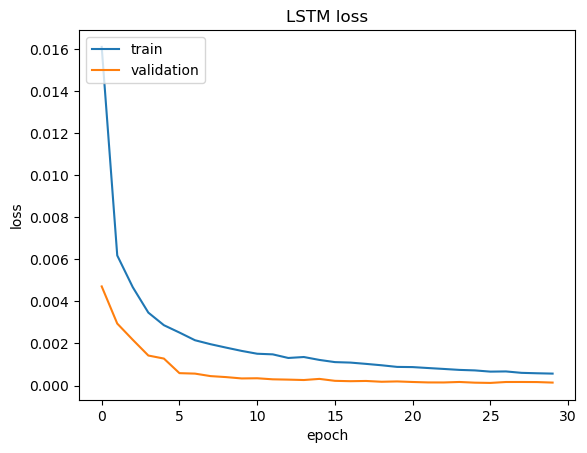

In [25]:
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
predictions = []
num_predictions = 1000

current_window = X_test[0].reshape(1, -1, 1)

for i in range(num_predictions):
    predict_val = model_lstm.predict(current_window)
    predictions.append(predict_val[0, 0])
    current_window = np.concatenate((current_window[:, 1:, :], predict_val.reshape(1, 1, 1)), axis=1)

y_test_actual = scaler.inverse_transform(np.array(Y_test).reshape(-1, 1))
predictions_actual = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━

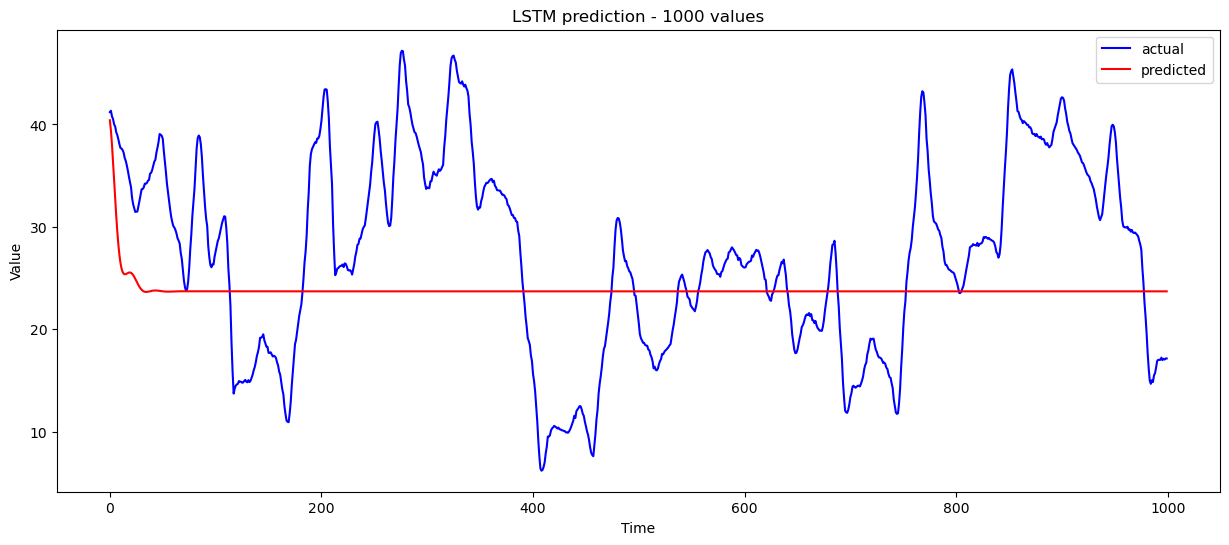

In [27]:
plt.figure(figsize=(15, 6))
plt.plot(y_test_actual[:num_predictions], label='actual', color='blue')
plt.plot(predictions_actual, label='predicted', color='red')
plt.title('LSTM prediction - 1000 values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()